In [2]:
import numpy as np 
from scipy.fftpack import fft #fast fourier transform
from scipy.io import wavfile #read and write soundfile
import matplotlib.pyplot as plt
from IPython.display import Audio #play file sound in colab

Fourier Series and Sound waves

In [3]:
# sample rate [samples/s]
rate = 10000
# time domain length (s)
L = 10.0
# time array
t = np.arange( 0, L, float(1.0/rate) )

# frequency (Hz)
f = 2000
# sine wave
def f_sin(f, t):
    return np.sin(2*np.pi*f*t)

# frequencies (Hz)
f1 = 300
f2 = 301
# beats
def f_beat(f1, f2, t):
    return ( np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) )  

#wavfile.write( '03_mi_new.wav', rate , f_beat(f1, f2, t) )
Audio(data=f_beat(f1, f2, t),rate=rate)


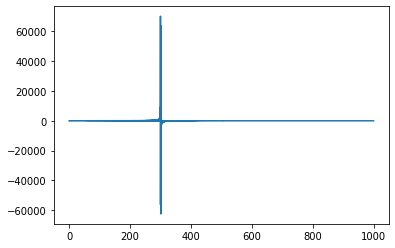

In [4]:
FT = np.fft.hfft( f_beat( f1, f2, t[:] ) )

f = np.arange( 1/(2*L), (len(FT)+1)/(2*L), 1/(2*L) )
plt.plot( f[0:20000],FT[0:20000] )

https://freesound.org/people/Jaz_the_MAN_2/packs/17749/

In [5]:
# Downloading files
!gdown --id 1ynN-g89A8vf_9oywhCZt31MdDVHTDieH
!gdown --id 1p34jWsq7Kc4jShf-shr5utEnJaJANI8O
!gdown --id 1urnz3TJ0mStG2QA2eDm_XjZAoXYJxgYN
!gdown --id 1od8wOzKHvCGFNP-k_ipaIsOjC7OEwUr7
!gdown --id 18gfe-EfEmND9TzA9hP1i7MAZaIkmIJ_E
!gdown --id 15-D-cejPCbR_lUDVbn10L2JI2Emfu058

Downloading...
From: https://drive.google.com/uc?id=1ynN-g89A8vf_9oywhCZt31MdDVHTDieH
To: /content/01-do.wav
100% 293k/293k [00:00<00:00, 38.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p34jWsq7Kc4jShf-shr5utEnJaJANI8O
To: /content/02-re.wav
100% 266k/266k [00:00<00:00, 79.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1urnz3TJ0mStG2QA2eDm_XjZAoXYJxgYN
To: /content/03-mi.wav
100% 237k/237k [00:00<00:00, 66.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1od8wOzKHvCGFNP-k_ipaIsOjC7OEwUr7
To: /content/04-fa.wav
100% 220k/220k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18gfe-EfEmND9TzA9hP1i7MAZaIkmIJ_E
To: /content/05-sol.wav
100% 236k/236k [00:00<00:00, 70.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=15-D-cejPCbR_lUDVbn10L2JI2Emfu058
To: /content/06-la.wav
100% 252k/252k [00:00<00:00, 35.1MB/s]


In [28]:
# define lowestArray
lowestF = []
# define function
def readFromAudioFile(fileName):
  wavdat = wavfile.read(fileName)
  rate = wavdat[0]
  num = len(wavdat[1])
  T_all = num/float(rate)
  A = wavdat[1][:,0]
  t = np.linspace( 1/float(rate), T_all, num=num )

  plt.xlabel( 'time (second)' )
  plt.ylabel( 'Amplitude (no unit)' )
  plt.plot( t, A )
  plt.show()

  FT = fft( A )
  f = np.linspace( 1/(2*T_all), num/(2*T_all), num=num )

  plt.xlim( 0, 2000 )
  plt.ylim( 0, 4e7 )
  plt.xlabel( 'frequency (Hz)' )
  plt.ylabel( 'Amplitude (no unit)' )
  plt.plot( f, np.abs(FT) )
  plt.show()

  # find lowest freq of this note
  lowestFeq = f[np.where(np.abs(FT) > 1e7)[0]][0]
  lowestF.append(lowestFeq)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


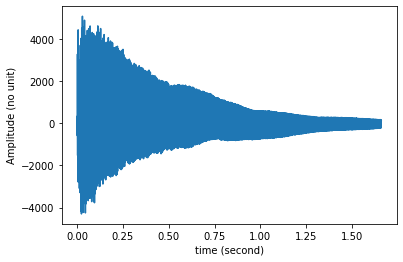

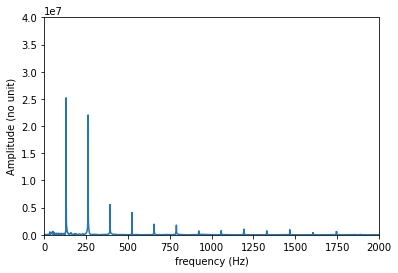

In [29]:
readFromAudioFile('01-do.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


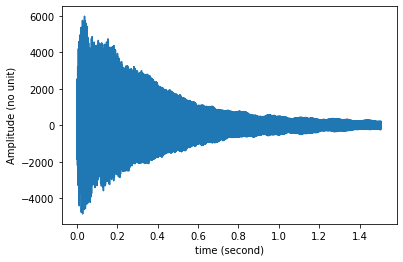

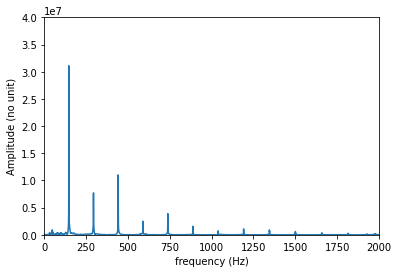

In [30]:
readFromAudioFile('02-re.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


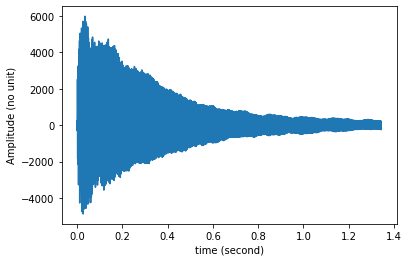

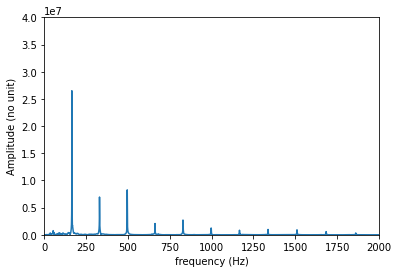

In [31]:
readFromAudioFile('03-mi.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


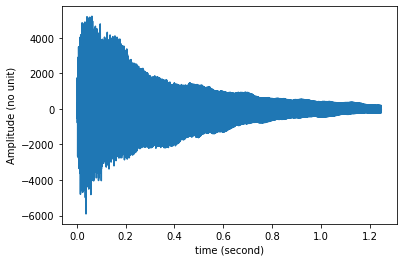

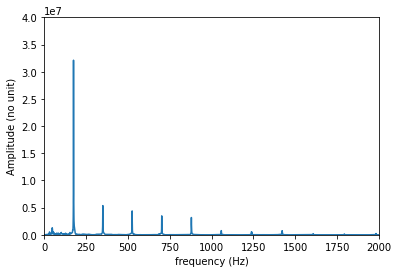

In [33]:
readFromAudioFile('04-fa.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


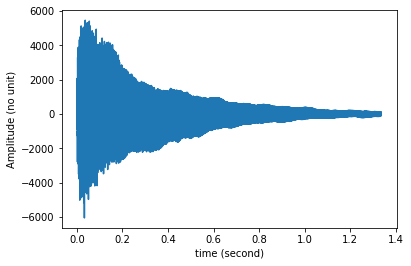

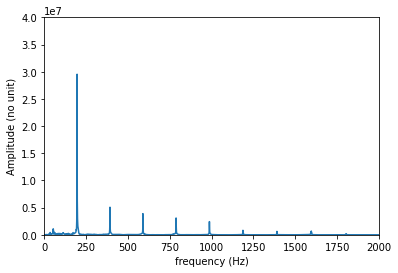

In [34]:
readFromAudioFile('05-sol.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


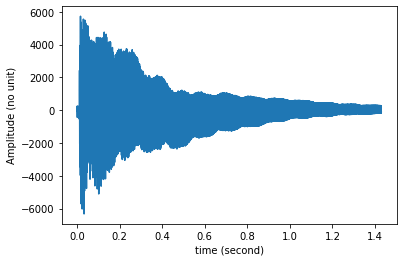

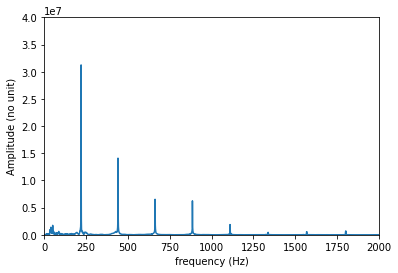

In [35]:
readFromAudioFile('06-la.wav')

In [36]:
print(lowestF)

[131.09751930567896, 146.8938915456104, 164.84937979917302, 174.72329753012377, 196.12309676981315, 220.0556904183921]


code cell ของโปรแกรมสร้างกราฟความสัมพันธ์ของความถี่ที่ต่ำที่สุดของโน้ต Do, Re, Mi, ...

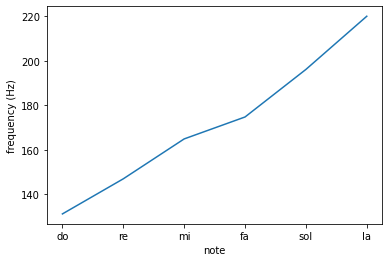

In [38]:
plt.ylabel( 'frequency (Hz)' )
plt.xlabel( 'note' )
plt.plot( ['do', 're', 'mi', 'fa', 'sol', 'la'], lowestF)
plt.show()

code cell ของโปรแกรมสร้างไฟล์เสียง beats ที่มีความถี่บีตส์ 0.1 Hz ของโน้ต Do, Re, Mi, ...

In [42]:
freq = lowestF[0]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

In [43]:
freq = lowestF[1]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

In [44]:
freq = lowestF[2]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

In [45]:
freq = lowestF[3]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

In [46]:
freq = lowestF[4]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

In [47]:
freq = lowestF[5]
Audio(data=f_beat(freq, freq+0.1, t),rate=rate)

**กิจกรรม**

1. ปรับแต่งโปรแกรมให้สามารถหาค่าความถี่ที่ต่ำที่สุดของโน้ต Do, Re, Mi, ...
2. code cell ของโปรแกรมสร้างกราฟความสัมพันธ์ของความถี่ที่ต่ำที่สุดของโน้ต Do, Re, Mi, ... 
3. code cell ของโปรแกรมสร้างไฟล์เสียง beats ที่มีความถี่บีตส์ 0.1 Hz ของโน้ต Do, Re, Mi, ... 

4. (optional) ลองวิเคราะไฟล์ .wav จากเสียงหรือเครื่องดนตรีชนิดอื่นๆ

อัพโหลดส่งเป็นไฟล์ .ipynb ทาง Google Classroom